In [1]:
# Declaring values

!pip install uncertainties
from uncertainties import ufloat

mz0 = ufloat(91.1880*10**9, 0.0020) # mass of Z boson
mw = ufloat(80.3692*10**9, 0.0133) # Mass of W boson 
mh = ufloat(125.20*10**9, 0.11) # Mass of Higgs Boson 
me = ufloat(0.51099895000*10**6, 1.5*10**10) # Mass of electron 
mmu = ufloat(105.6583755*10**6, 0.0000023) # Mass of Muon 
mt = ufloat(1776.93*10**6, 0.09) # Mass of Tau



Part 1: The Invariant Mass Distribution
           0          1         2         3         4         5           6  \
0  33.144898  21.067385  2.176089 -0.139190  0.214251 -2.670418  147.913470   
1  42.871246  37.205387  0.067116 -0.946074 -0.132653 -2.926308   42.967840   
2  33.070188  29.222084 -0.366347 -2.146044  2.462502 -0.861610   35.314297   
3  28.597910  19.120684  1.951096  2.089655 -1.353901  1.913332  102.645260   
4  49.459629  35.819855 -1.319296 -0.482460  1.621212 -1.404498   99.119836   

            7  
0   21.271793  
1   55.135395  
2  126.647130  
3   78.450766  
4   40.070199  


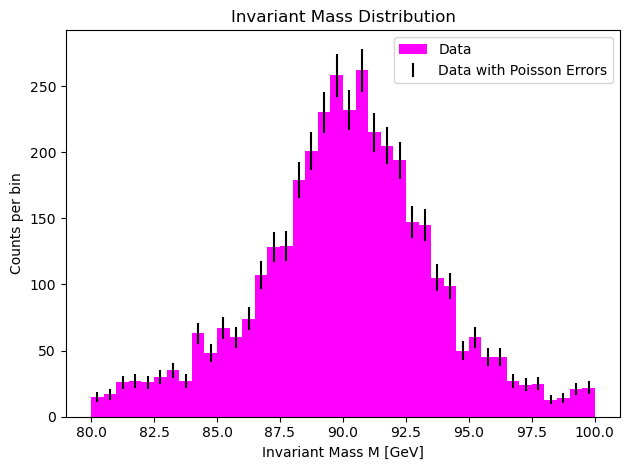

In [2]:
print("Part 1: The Invariant Mass Distribution")

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

#data = pd.read_csv('atlas_z_to_ll.csv', sep=',', header=0, names=['pt1','pt2','eta1','eta2','phi1','phi2','E1','E2']) 
data = pd.read_csv('/Users/rileylutz/Downloads/atlas_z_to_ll.csv', header=None, skiprows=1, dtype=float) 

print(data.head()) 


pt1, pt2 = data[0], data[1] 
eta1,eta2 = data[2], data[3] 
phi1, phi2 = data[4], data[5] 
E1, E2 = data[6], data[7] 
                   

px1 = pt1*np.cos(phi1)
py1 = pt1*np.sin(phi1)
pz1 = pt1*np.sinh(eta1)

px2 = pt2*np.cos(phi2)
py2 = pt2*np.sin(phi2)
pz2 = pt2*np.sinh(eta2)

Etot = E1 + E2 
px_tot = px1 + px2 
py_tot = py1 +py2 
pz_tot = pz1 + pz2

M = np.sqrt(np.maximum(0, Etot**2 - ((px_tot**2)+(py_tot**2)+(pz_tot**2)))) 

bins = np.linspace(80,100,41)
counts, bin_edges = np.histogram(M, bins=bins) 
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
errs = np.sqrt(counts) 

fig, ax = plt.subplots() 
ax.hist(M, bins=bins, histtype='bar', color='magenta', label='Data')
ax.errorbar(bin_centers, counts, yerr=errs, fmt='None', color='black', label='Data with Poisson Errors')
ax.set_xlabel("Invariant Mass M [GeV]") 
ax.set_ylabel("Counts per bin") 
ax.set_title("Invariant Mass Distribution") 
ax.legend() 
fig.tight_layout() 

Part 2: Breit-Wigner Fit
Best-fit mass = m0 = 90.341 +- 0.094 GeV
Best fit width: Gamma = 6.390998394104447 +- 0.181 GeV
Chi-squared: 9.985
Reduced chi-squared: chi^2 / ndof = 0.999
P-value: 0.4418


Text(0.05, 0.95, '$m_0$ = 90.3 +- 0.1 GeV\n$\\Gamma$ = 6.4 +- 0.2 GeV\n$\\chi^2$/ndof = 1.0\np-value = 0.44')

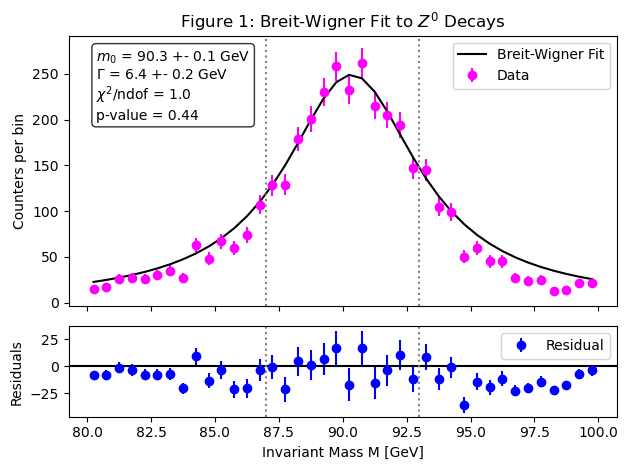

In [6]:
from scipy.stats import chi2

print("Part 2: Breit-Wigner Fit")

def breit_wigner(m, m0, gamma):
    return (1/np.pi)*(gamma/2)/((m-m0)**2+(gamma/2)**2) 

from scipy.optimize import curve_fit 

mask = (bin_centers>87) & (bin_centers < 93) 

def fit_func(m, m0, gamma): 
    norm = 5000/2 
    return norm*breit_wigner(m, m0, gamma)

popt, pcov = curve_fit(fit_func, bin_centers[mask], counts[mask], sigma=errs[mask], absolute_sigma=True)
m0_fit, gamma_fit = popt 
m0_uncertainty, gamma_uncertainty = np.sqrt(np.diag(pcov)) 

fig, (ax, ax_r) = plt.subplots(2,1, gridspec_kw = {'height_ratios': [3,1]}, sharex=True)

ax.errorbar(bin_centers, counts, yerr=errs, fmt='o', label='Data', color='magenta') 
ax.plot(bin_centers, fit_func(bin_centers, *popt), label=f'Breit-Wigner Fit', color='black')

ax.axvline(87, linestyle='dotted', color='gray') 
ax.axvline(93, linestyle='dotted', color='gray')

ax.set_ylabel("Counters per bin") 
ax.set_title("Figure 1: Breit-Wigner Fit to $Z^0$ Decays")


residuals = counts-fit_func(bin_centers, *popt)
ax_r.errorbar(bin_centers, residuals, yerr=errs, fmt='o', color='blue',label='Residual')
ax_r.axhline(0, color='black') 
ax_r.axvline(87, linestyle='dotted', color='gray') 
ax_r.axvline(93, linestyle='dotted', color='gray') 
ax_r.set_ylabel("Residuals") 
ax_r.set_xlabel("Invariant Mass M [GeV]") 
fig.tight_layout() 
ax.legend() 
ax_r.legend() 

chi2_val = np.sum(((counts[mask]-fit_func(bin_centers[mask], *popt))/errs[mask])**2) 
ndof = len(counts[mask]) - len(popt)
chi2_red = chi2_val/ndof 
p_value = chi2.sf(chi2_val, ndof) 

print(f'Best-fit mass = m0 = {m0_fit:.3f} +- {m0_uncertainty:.3f} GeV')
print(f'Best fit width: Gamma = {gamma_fit} +- {gamma_uncertainty:.3f} GeV') 
print(f"Chi-squared: {chi2_val:.3f}") 
print(f"Reduced chi-squared: chi^2 / ndof = {chi2_red:.3f}") 
print(f"P-value: {p_value:.4f}") 

textstr='\n'.join(( 
    f"$m_0$ = {m0_fit:.1f} +- {m0_uncertainty:.1f} GeV",
    f"$\\Gamma$ = {gamma_fit:.1f} +- {gamma_uncertainty:.1f} GeV", 
    f"$\\chi^2$/ndof = {chi2_red:.1f}",
    f"p-value = {p_value:.2f}")) 

ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white',alpha=0.8)) 


Part 3: 2D Parameter Contours


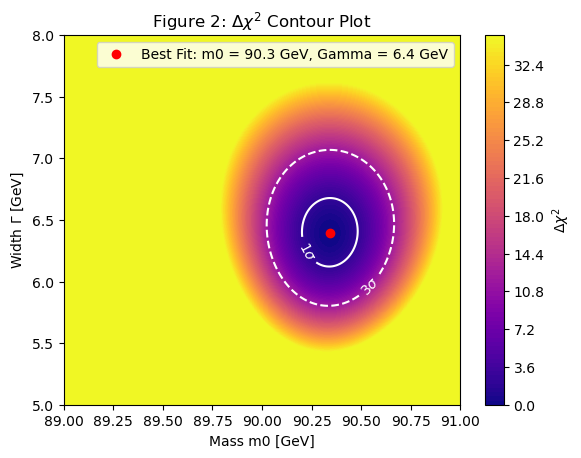

In [4]:
print("Part 3: 2D Parameter Contours")

m0_vals = np.linspace(89,91,300) 
gamma_vals = np.linspace(5,8,300) 
M0, G = np.meshgrid(m0_vals, gamma_vals) 

chi2_grid = np.zeros_like(M0)

for i in range(M0.shape[0]): 
    for j in range(M0.shape[1]): 
        m0 = M0[i, j] 
        gamma = G[i, j]
        
        model_vals = fit_func(bin_centers[mask], m0, gamma)
        residuals = counts[mask] - model_vals
        chi2 = np.sum((residuals/errs[mask])**2) 
        chi2_grid[i, j] = chi2 

min_chi2 = np.min(chi2_grid) 
delta_chi2 = chi2_grid - min_chi2 

X, Y = np.meshgrid(m0_vals, gamma_vals) 

fig, ax = plt.subplots() 
c = ax.contourf(M0, G, np.clip(delta_chi2, 0, 35), levels=100, cmap='plasma')
cb = fig.colorbar(c, ax=ax) 
cb.set_label(r"$\Delta\chi^2$") 

levels = [2.3, 11.83] 
cs = ax.contour(M0, G, delta_chi2, levels=levels, colors='white', linestyles=['solid', 'dashed']) 
ax.clabel(cs, fmt={2.30: "$1 \\sigma$", 11.83: "$3 \\sigma$"}, inline=True) 

ax.plot(m0_fit, gamma_fit, 'ro', label=f'Best Fit: m0 = {m0_fit:.1f} GeV, Gamma = {gamma_fit:.1f} GeV') 

ax.set_xlabel("Mass m0 [GeV]") 
ax.set_ylabel("Width $\\Gamma$ [GeV]") 
ax.set_title("Figure 2: $\\Delta\\chi^2$ Contour Plot") 

ax.legend() 